
# Fetching Forex Rates

Fetching historical daily rates for **AUDUSD** (Austarlian Dollar / US Dollar).

Using [AlphaVantage Service](https://alphavantage.co) and [alpha_vantage package](https://github.com/RomelTorres/alpha_vantage/).

## Prepare API Keys

Firstly, [get an API Key from AlphaVantage](https://www.alphavantage.co/support/#api-key). 
Secondly, [Set & Get API Keys from environment variable](https://stackoverflow.com/a/5971326/3381997). 


In [18]:
import os, sys

api_key = "demo"
try:  
   api_key = os.environ["ALPHAVANTAGE_API_KEY"]
   print("Found AlphaVantage API Key")
except KeyError: 
   print("Please set the environment variable ALPHAVANTAGE_API_KEY")
   sys.exit(1)

Please set the environment variable ALPHAVANTAGE_API_KEY


SystemExit: 1

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)



## Getting Data via REST API

For more info, please visit [AlphaVantage Docs](https://www.alphavantage.co/documentation/).

### Getting Data


In [19]:

import pandas as pd
import requests, io

base_url = 'https://www.alphavantage.co'
api_function = 'FX_DAILY'
from_symbol = 'AUD' # AUDUSD
to_symbol = 'USD' # AUDUSD
data_type = 'csv'
output_size = 'full'
symbol = 'AUDUSD'

# Building api_url
api_url = '{}/query?function={}&from_symbol={}&to_symbol={}&outputsize={}&apikey={}&datatype={}'.format(base_url,
                                                                                                        api_function,
                                                                                                        from_symbol,
                                                                                                        to_symbol,
                                                                                                        api_key,
                                                                                                        output_size,
                                                                                                        data_type)

# Getting Data
raw_data = requests.get(api_url)
AUDUSD_csv = raw_data.content
AUDUSD_df = pd.read_csv(io.StringIO(AUDUSD_csv.decode('utf-8')))


### Processing Data


In [20]:

AUDUSD_df['pre_close'] = AUDUSD_df.close.shift(-1)
AUDUSD_df['p_change'] = (AUDUSD_df.close / AUDUSD_df.pre_close - 1) # Raw percentage change
AUDUSD_df['pip_change'] = (AUDUSD_df.close / AUDUSD_df.pre_close - 1) * 10000 # Pip Change (Percentage of a Point)



### Sorting Data


In [21]:

# Sorting Data by dates
AUDUSD_df = AUDUSD_df.sort_values('timestamp', ascending=True) 
AUDUSD_df = AUDUSD_df.iloc[1:]

# Save & Print
AUDUSD_df.to_csv('../gen/{}{}_Daily_df.csv'.format(from_symbol, to_symbol))
AUDUSD_df.head()


,timestamp,open,high,low,close,pre_close,p_change,pip_change
4998,2001-05-15,0.5193,0.5212,0.5150,0.5206,0.5193,0.002503,25.033699
4997,2001-05-16,0.5209,0.5240,0.5182,0.5233,0.5206,0.005186,51.863235
4996,2001-05-17,0.5230,0.5293,0.5220,0.5279,0.5233,0.008790,87.903688
4995,2001-05-18,0.5274,0.5300,0.5238,0.5291,0.5279,0.002273,22.731578
4994,2001-05-21,0.5295,0.5320,0.5266,0.5270,0.5291,-0.003969,-39.690040



## Getting Data via `alpha_vantage` package

Getting data via REST API can get messy sometime. Instead, We can use `alpha_vantage` package to get this done easily.

Visit [`alpha_vantage` Docs](https://github.com/RomelTorres/alpha_vantage/). 


In [10]:

from alpha_vantage.foreignexchange import ForeignExchange
import matplotlib.pyplot as plt

fx = ForeignExchange(key=api_key, 
                     output_format='pandas',
                     indexing_type='date')
data_df, meta_data = fx.get_currency_exchange_daily(from_symbol=from_symbol,
                                                      to_symbol=to_symbol,
                                                      outputsize=output_size)
data_df = data_df.sort_values('date', ascending=True)

# Save & Print
print("meta_data: {}".format(meta_data))
data_df.head()


meta_data: {'1. Information': 'Forex Daily Prices (open, high, low, close)', '2. From Symbol': 'EUR', '3. To Symbol': 'USD', '4. Output Size': 'Full size', '5. Last Refreshed': '2019-06-18 17:40:00', '6. Time Zone': 'GMT+8'}


,1. open,2. high,3. low,4. close
date,,,,
2001-04-10,0.8980,0.8994,0.8864,0.8876
2001-04-11,0.8879,0.8914,0.8805,0.8866
2001-04-12,0.8868,0.8942,0.8833,0.8917
2001-04-13,0.8918,0.8935,0.8878,0.8886
2001-04-16,0.8891,0.8903,0.8828,0.8858



## Plotting Data

Plotting close data.


In [ ]:

data_df['4. close'].plot()
plt.title('The Forex rate for the AUDUSD (Daily)')
plt.show()


Daily pip Change for AUDUSD since 2001-05-11


count    4999.000000
mean        0.000085
std         0.007776
min        -0.082655
25%        -0.003668
50%         0.000255
75%         0.004112
max         0.083761
Name: p_change, dtype: float64

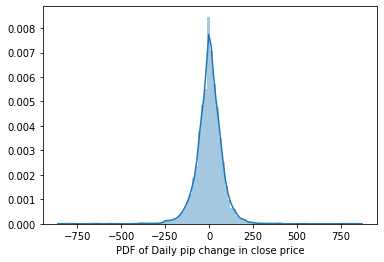

In [10]:
import seaborn as sns

sns.distplot(AUDUSD_df.pip_change,
             axlabel="PDF of Daily pip change in close price",
             bins=100)
print("Daily pip Change for AUDUSD since 2001-05-11")
AUDUSD_df.p_change.describe()